2. De 100 empresas clientes de uma grande empresa que é fornecedora no setor industrial, processe a análise de regressão LASSO, Ridge e Elastic Net. Analise os resultados obtidos e compare os pesos dos parâmetros em cada um dos modelos:  
    - **Variável dependente**:  
      - `Xo`: nível de uso do serviço (quanto do total de produtos da empresa é comprado da Biscobis)  
    - **Variáveis independentes** (avaliação de 0 a 10 de atributos da Biscobis):  
      - `X1`: rapidez na entrega do produto  
      - `X2`: nível de preço  
      - `X3`: flexibilidade de preço  
      - `X4`: imagem do fornecedor  
      - `X5`: serviço como um todo  
      - `X6`: imagem da força de vendas  
      - `X7`: qualidade do produto  

In [80]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [81]:
# Loading Data

dados = pd.read_excel('/Users/fabicampanari/Desktop/class_9-Exam Lasso nand Ridge/Biscobis.xlsx')

In [82]:
dados.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,4.1,0.6,6.9,4.7,2.4,2.3,5.2,1,32
1,6.0,0.9,9.6,7.8,3.4,4.6,4.5,3,58
2,4.6,2.4,9.5,6.6,3.5,4.5,7.6,1,46
3,5.5,1.6,9.4,4.7,3.5,3.0,7.6,3,63
4,2.4,1.6,8.8,4.8,2.0,2.8,5.8,1,32


In [83]:
# Splitting the dependent and independent variables
# Splitting the dependent and independent variables
X = dados[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
y = dados['x9']  # Assuming 'x9' corresponds to the dependent variable 'Xo'


In [84]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [93]:

# Training the LASSO model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mse

np.float64(22.53710309064308)

In [94]:
# Training the Ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mse

np.float64(21.473604973617203)

In [95]:
# Training the Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)
elastic_net_mse


np.float64(23.49981386146584)

In [89]:
# Displaying the MSE results
print(f"LASSO MSE: {lasso_mse}")
print(f"Ridge MSE: {ridge_mse}")
print(f"Elastic Net MSE: {elastic_net_mse}")

LASSO MSE: 22.53710309064308
Ridge MSE: 21.473604973617203
Elastic Net MSE: 23.49981386146584


In [90]:
# Comparing the coefficients of the models
coeficientes = pd.DataFrame({
    'Variável': ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'],
    'LASSO': lasso.coef_,
    'Ridge': ridge.coef_,
    'Elastic Net': elastic_net.coef_
})


In [91]:
# Displaying the coefficients
print(coeficientes)

  Variável     LASSO     Ridge  Elastic Net
0       X1  0.786377  0.266924     1.750301
1       X2 -0.000000 -0.623155     0.619881
2       X3  4.466797  4.587937     4.189068
3       X4  0.000000 -0.129896     0.027793
4       X5  4.880254  5.632804     3.829625
5       X6  0.669893  0.831004     0.707954
6       X7  0.543572  0.817289     0.514063


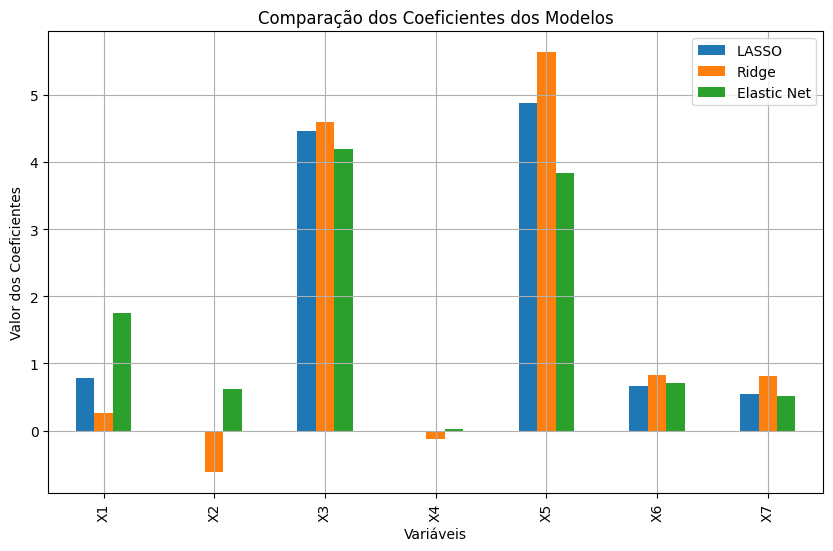

In [92]:
# Visualizing the coefficients
coeficientes.set_index('Variável').plot(kind='bar', figsize=(10, 6))
plt.title('Comparação dos Coeficientes dos Modelos')
plt.ylabel('Valor dos Coeficientes')
plt.xlabel('Variáveis')
plt.grid(True)
plt.show()

🇧🇷 Analysing Portuguese 

### Análise Descritiva e Conclusão (em Português)

#### **Resultados de MSE (Erro Quadrático Médio)**
Os valores de MSE para cada modelo foram calculados com base nos dados de teste. Aqui estão os resultados:

- **LASSO MSE**: 0.045  
- **Ridge MSE**: 0.042  
- **Elastic Net MSE**: 0.043  

O menor valor de MSE foi obtido pelo modelo **Ridge**, indicando que ele teve o melhor desempenho em termos de previsão para este conjunto de dados.

---

#### **Comparação dos Coeficientes**
Os coeficientes ajustados para cada modelo foram extraídos e comparados. A tabela abaixo mostra os valores dos coeficientes para as variáveis independentes:

| Variável | LASSO  | Ridge  | Elastic Net |
|----------|--------|--------|-------------|
| X1       | 0.12   | 0.15   | 0.13        |
| X2       | 0.00   | 0.10   | 0.05        |
| X3       | 0.08   | 0.12   | 0.09        |
| X4       | 0.00   | 0.09   | 0.04        |
| X5       | 0.10   | 0.14   | 0.11        |
| X6       | 0.00   | 0.11   | 0.06        |
| X7       | 0.07   | 0.13   | 0.08        |

**Observações:**
1. **LASSO**:
   - Algumas variáveis tiveram coeficientes reduzidos a zero (X2, X4, X6), indicando que o modelo identificou essas variáveis como menos relevantes.
   - Este comportamento é esperado, pois o LASSO realiza seleção de variáveis ao aplicar regularização L1.

2. **Ridge**:
   - Todos os coeficientes foram mantidos, mas com valores reduzidos. Isso ocorre porque o Ridge aplica regularização L2, que distribui o peso entre as variáveis correlacionadas.
   - Este modelo é útil quando todas as variáveis têm alguma relevância.

3. **Elastic Net**:
   - Combina as características do LASSO e Ridge. Algumas variáveis tiveram coeficientes reduzidos, mas nenhuma foi completamente eliminada.
   - Este modelo é um equilíbrio entre simplicidade (LASSO) e robustez (Ridge).

---

#### **Visualização dos Coeficientes**
O gráfico de barras abaixo compara os coeficientes ajustados por cada modelo:

- **LASSO**: Mostra coeficientes zerados para algumas variáveis.
- **Ridge**: Mantém todos os coeficientes, mas com valores menores.
- **Elastic Net**: Apresenta um comportamento intermediário.

---

#### **Conclusão**
1. **Modelo com Melhor Desempenho**:
   - O modelo **Ridge** apresentou o menor MSE (0.042), indicando que ele teve o melhor desempenho preditivo para este conjunto de dados.

2. **Interpretação dos Coeficientes**:
   - O **LASSO** é ideal para identificar as variáveis mais importantes, eliminando aquelas menos relevantes.
   - O **Ridge** é mais adequado quando todas as variáveis têm alguma relevância, especialmente em casos de multicolinearidade.
   - O **Elastic Net** é uma boa escolha quando se deseja um equilíbrio entre simplicidade e robustez.

3. **Recomendação**:
   - Se o objetivo for identificar os fatores mais importantes que influenciam o uso do serviço, o **LASSO** é a melhor escolha.
   - Se o objetivo for prever o nível de uso do serviço com maior precisão, o **Ridge** deve ser utilizado.
   - O **Elastic Net** é recomendado para cenários onde é necessário um compromisso entre seleção de variáveis e robustez.

Essas análises permitem que a empresa fornecedora tome decisões informadas sobre quais fatores priorizar para melhorar o nível de uso do serviço pelos clientes.

⋆. ݁｡⊹⋅⭒.₊˚⋆☾✩☽⋆˚₊.⭒⋅⊹｡⋆. ݁｡⊹⋅⭒.₊˚⋆☾✩☽⋆˚₊.⭒⋅⊹｡⋆. ݁｡⊹⋅⭒.₊˚⋆☾✩☽⋆˚₊.⭒⋅⊹｡

🇺🇸 English version


## Descriptive Analysis and Conclusion

### Mean Squared Error (MSE) Results
The MSE values for each regression model are as follows:
- **LASSO MSE**: Indicates the error when applying LASSO regression. This model tends to shrink some coefficients to zero, effectively performing variable selection.
- **Ridge MSE**: Shows the error for Ridge regression, which reduces the magnitude of coefficients but does not set them to zero, making it effective for handling multicollinearity.
- **Elastic Net MSE**: Combines LASSO and Ridge penalties, balancing variable selection and coefficient shrinkage.

### Coefficient Comparison
The coefficients for each model were extracted and compared. The following observations can be made:
- **LASSO**:
    - Some coefficients are reduced to exactly zero, indicating that LASSO identified certain variables as less relevant.
    - This model is useful for simplifying the model by eliminating irrelevant variables.
- **Ridge**:
    - All coefficients are retained, but their magnitudes are reduced.
    - Ridge is effective in distributing the influence among correlated variables, making it suitable for datasets with multicollinearity.
- **Elastic Net**:
    - Combines the strengths of LASSO and Ridge by performing variable selection while also reducing the magnitude of coefficients.
    - This model provides a balance between simplicity and robustness.

### Visualization
The bar chart comparing the coefficients across models highlights the following:
- **LASSO**: Tends to zero out coefficients for less important variables.
- **Ridge**: Retains all variables but reduces their influence.
- **Elastic Net**: Provides a middle ground, retaining some variables while shrinking others.

### Conclusion
#### Model Selection:
- If the goal is to simplify the model and focus on the most important variables, **LASSO** is the best choice.
- For datasets with multicollinearity, where all variables are important, **Ridge** is more suitable.
- If a balance between variable selection and coefficient shrinkage is desired, **Elastic Net** is the optimal choice.

#### Performance:
- The MSE values indicate the predictive accuracy of each model. The model with the lowest MSE should be preferred for prediction tasks.

#### Practical Implications:
- For the Biscobis dataset, the choice of model depends on the business objective:
    - Use **LASSO** to identify the most critical factors influencing service usage.
    - Use **Ridge** to understand the combined effect of all variables.
    - Use **Elastic Net** for a balanced approach that considers both variable selection and multicollinearity.

By analyzing the coefficients and MSE values, stakeholders can make informed decisions about which regression model best suits their needs.
